In [6]:
import keras
import os
from keras import layers
from keras_preprocessing import image
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import BatchNormalization,Conv2D,Dense,Flatten,Dropout,MaxPooling2D,Input,UpSampling2D

In [7]:
train_path='train'
test_path='test'
train_data=[]
train_label=[]
test_data=[]
test_label=[]
mp={
    'angry':0,
    'fear':1,
    'happy':2,
    'neutral':3,
    'sad':4,
    'surprise':5
}
classes=['angry','fear','happy','neutral','sad','surprise']

In [8]:
for category in classes:
    for filename in os.listdir(train_path+'/'+category):
        img=image.load_img(train_path+'/'+category+'/'+filename,target_size=(48,48),color_mode='grayscale')
        train_data.append(image.img_to_array(img))
        train_label.append(mp[category])
train_data=np.array(train_data)
train_data=train_data.reshape(-1,48,48,1)
train_label=np.array(train_label)
train_label=train_label.reshape(-1,1)
ohe=OneHotEncoder(sparse=False).fit(train_label)
train_label=ohe.transform(train_label)
train_data=train_data.astype('float32')/255.

In [9]:
for category in classes:
    for filename in os.listdir(test_path+'/'+category):
        img=image.load_img(test_path+'/'+category+'/'+filename,target_size=(48,48),color_mode='grayscale')
        test_data.append(image.img_to_array(img))
        test_label.append(mp[category])
test_data=np.array(test_data)
test_data=test_data.reshape(-1,48,48,1)
test_label=np.array(test_label)
test_label=test_label.reshape(-1,1)
test_label=ohe.transform(test_label)
test_data=test_data.astype('float32')/255.

In [ ]:
inp=Input(shape=(48,48,1))
# autoencoder
# encoder

x=Conv2D(64,(3,3),activation='relu',padding='same')(inp)
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Dropout(0.4)(x)

x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Dropout(0.4)(x)

x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Dropout(0.4)(x)

x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Dropout(0.4)(x)

x=Conv2D(512,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(512,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(512,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(512,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
encoder=MaxPooling2D((2,2))(x)

#decoder
x=UpSampling2D((3,3))(encoder)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
# x=UpSampling2D((3,3))(x)
x=Dropout(0.3)(x)

x=UpSampling2D((2,2))(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)

x=UpSampling2D((2,2))(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=UpSampling2D((2,2))(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)

x=UpSampling2D((2,2))(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)

decoder=Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

model=Model(inp,decoder)

model.summary()

In [ ]:
model.compile(optimizer='adam',loss='mse')
hist = model.fit(train_data,train_data,validation_data=(test_data,test_data),shuffle=True,epochs=10)

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train', 'val'],loc='upper right')

In [ ]:
model.save('autoencoderv2.h5')

In [10]:
model=keras.models.load_model('autoencoderv2.h5')#load autoencoder model
model.evaluate(test_data,test_data)

221/221 [==============================] - 16s 33ms/step - loss: 0.0203


0.020321890711784363

In [6]:
inp=Input(shape=(48,48,1))
# encoder
x=Conv2D(64,(3,3),activation='relu',padding='same')(inp)
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Dropout(0.4)(x)

x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Dropout(0.4)(x)

x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Dropout(0.4)(x)

x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Dropout(0.4)(x)

x=Conv2D(512,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(512,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(512,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(512,(3,3),activation='relu',padding='same')(x)
x=BatchNormalization()(x)
encoder=MaxPooling2D((2,2))(x)

In [19]:
x=Flatten()(encoder)
x=Dropout(0.5)(x)
x=Dense(6,activation='softmax')(x)
fullmodel=Model(inp,x)
fullmodel.summary()
for l1,l2 in zip(fullmodel.layers[:44],model.layers[0:44]):
    l1.set_weights(l2.get_weights())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0   

In [20]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='auto',verbose=1,patience=5)
chk= tf.keras.callbacks.ModelCheckpoint(
    filepath='adam_res.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [21]:
fullmodel.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
fullhist = fullmodel.fit(train_data,train_label,validation_data=(test_data,test_label),shuffle=True,epochs=100,callbacks=[es,chk])

Epoch 1/100
884/884 [==============================] - 71s 78ms/step - loss: 1.9309 - accuracy: 0.3000 - val_loss: 1.3410 - val_accuracy: 0.4753
Epoch 2/100
884/884 [==============================] - 68s 77ms/step - loss: 1.3243 - accuracy: 0.4763 - val_loss: 1.2394 - val_accuracy: 0.5149
Epoch 3/100
884/884 [==============================] - 68s 77ms/step - loss: 1.2124 - accuracy: 0.5273 - val_loss: 1.1966 - val_accuracy: 0.5288
Epoch 4/100
884/884 [==============================] - 65s 74ms/step - loss: 1.1444 - accuracy: 0.5598 - val_loss: 1.1348 - val_accuracy: 0.5654A: 18s - loss: 1.1450 - accura - ETA: 17 - ETA: 14s - loss: 1.1452 - accuracy: 0. - ETA: 14s - loss: 1.1452 - ETA: 10s - loss: 1.1451  - ETA: 9s - loss: 1.1451 - accuracy: 0.55 - ETA: 9s - loss: 1.1451 - accuracy: 0.55 - ETA: 9s - loss: 1.1451 - accura - ETA: 8s - ETA: 7s - loss: 1.1 - ETA: 0s - loss:
Epoch 5/100
884/884 [==============================] - 63s 71ms/step - loss: 1.0709 - accuracy: 0.5924 - val_loss: 1.1

In [23]:
fullmodel=keras.models.load_model('adam_res.h5')

In [24]:
fullmodel.evaluate(test_data,test_label)

221/221 [==============================] - 5s 19ms/step - loss: 1.3056 - accuracy: 0.6481


[1.3056224584579468, 0.6480826139450073]

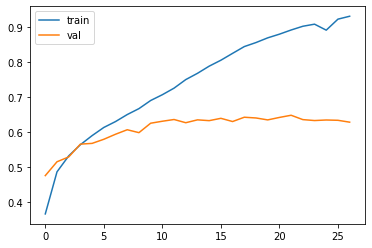

In [25]:
plt.plot(fullhist.history['accuracy'])
plt.plot(fullhist.history['val_accuracy'])
plt.legend(['train', 'val'],loc='upper left')

In [ ]:
fullmodel.save('emotion_recog_best.h5')

In [ ]:
plt.plot(fullmodel.history().history['accuracy'])

<AxesSubplot:>

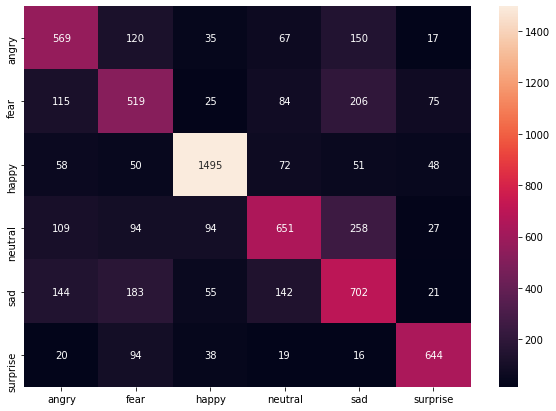

In [26]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import pandas as pd

y_pred=fullmodel.predict(test_data)
y_true=test_label

y_true=ohe.inverse_transform(y_true)
y_pred=ohe.inverse_transform(y_pred)

cf_matrix=confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                  columns = [i for i in classes])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')